# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Comparing the number of hidden units
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import libraries
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

# Import and organize the data

In [2]:
# import dataset
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print( iris.head() )

# some plots to show the data
sns.pairplot(iris, hue='species')
plt.show()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


NameError: name 'sns' is not defined

In [3]:
# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Functions to create and train the model

In [19]:
# Note the input into the function!
def createIrisModel(nHidden):

  # model architecture (with number of units soft-coded!)
  ANNiris = nn.Sequential(
      nn.Linear(4,nHidden),      # input layer
      nn.ReLU(),                 # activation unit
      nn.Linear(nHidden,nHidden),# hidden layer
      nn.ReLU(),                 # activation unit
      nn.Linear(nHidden,3),      # output unit
      #nn.Softmax(dim=1),        # final activation unit (here for conceptual purposes, note the CEL function)
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

  return ANNiris,lossfun,optimizer

In [11]:
# a function to train the model

def trainTheModel(ANNiris):

  # initialize losses
  losses = torch.zeros(numepochs)
  ongoingAcc = []

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNiris(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # final forward pass
  predictions = ANNiris(data)

  predlabels = torch.argmax(predictions,axis=1)
  return 100*torch.mean((predlabels==labels).float())

# Run the experiment!

In [20]:
numepochs  = 150
numhiddens = np.arange(1,130, 14)
accuracies = []

for nunits in numhiddens:

  # create a fresh model instance
  ANNiris,lossfun,optimizer = createIrisModel(nunits)

  # run the model
  acc = trainTheModel(ANNiris)
  accuracies.append( acc )


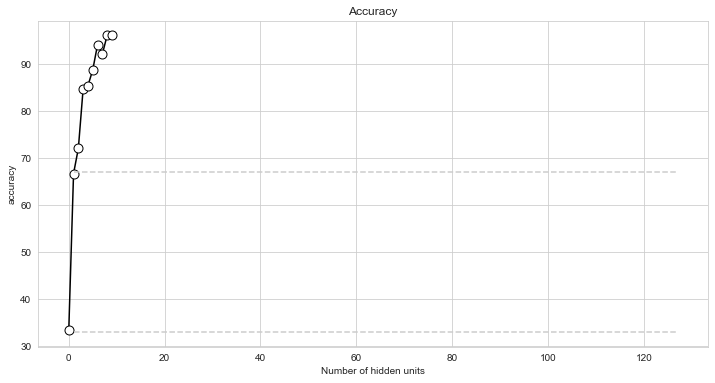

In [21]:
# report accuracy
fig,ax = plt.subplots(1,figsize=(12,6))

ax.plot(accuracies,'ko-',markerfacecolor='w',markersize=9)
ax.plot(numhiddens[[0,-1]],[33,33],'--',color=[.8,.8,.8])
ax.plot(numhiddens[[0,-1]],[67,67],'--',color=[.8,.8,.8])
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')
plt.show()


# Additional explorations

In [ ]:
# 1) The results here show that models with fewer than ~50 hidden units have lackluster performance. Would these models
#    eventually learn if they were given more training epochs? Try this by re-running the experiment using 500 epochs.
#    Tip: Copy/paste the plotting code into a new cell to keep both plots. Or, take screenshots of the plots.
#
# 2) Going back to 150 epochs, explore the effect of changing the learning rate. This doesn't need to be a full parametric
#    experiment; you can simply try is again using learning rates of .1, .01 (what we used in the video), and .001.
#
# 3) With simple models and small datasets, it's possible to test many different parameter settings. However, larger
#    models take longer to train, and so running 128 tests is not always feasible. Modify the code to have the number of
#    hidden units range from 1 to 128 in steps of 14. Plot the results on top of the results using steps of 1 (that is,
#    show both results in the same graph). Does your interpretation change with fewer experiment runs?
